In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to python environment


In [2]:
data=pd.read_excel(r"C:\Users\jbnay\Downloads\iris (3).xls") 

2. Do the necessary pre-processing steps

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do the necessary pre-processing steps

In [4]:
data.shape

(150, 5)

In [5]:
 data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [8]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
for col in ['SW','PL']:
    data[col]=data[col].fillna(data[col].median()) 

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


handling outliers

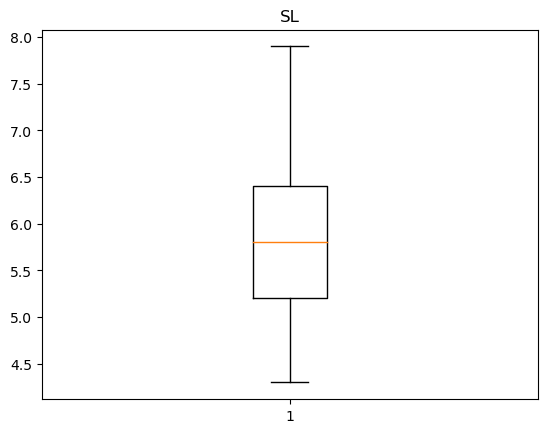

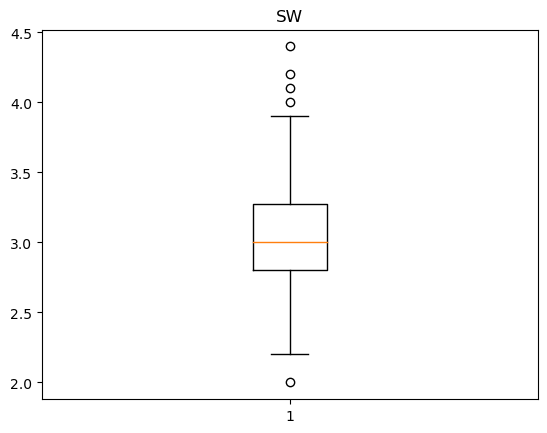

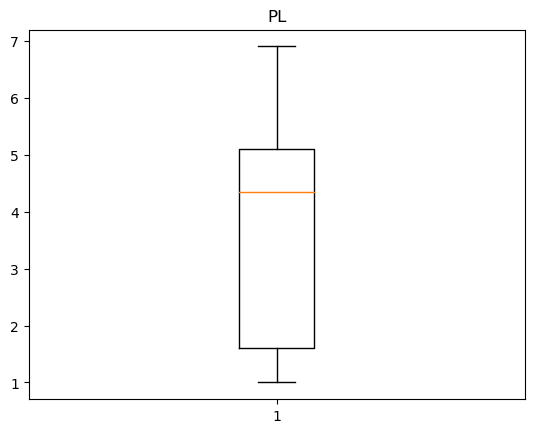

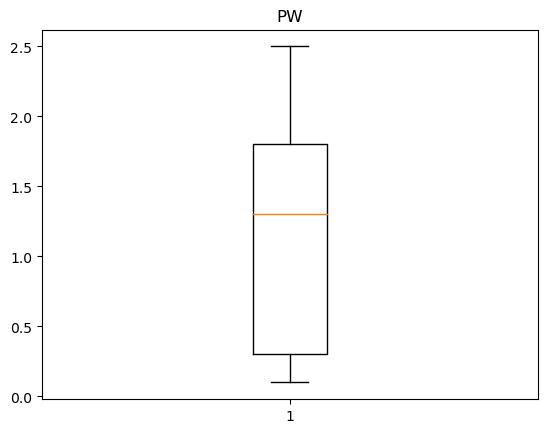

In [12]:
num_cols=['SL','SW','PL','PW']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [13]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

C:\Users\jbnay\AppData\Local\Temp\ipykernel_4768\3273127858.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\jbnay\AppData\Local\Temp\ipykernel_4768\3273127858.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\jbnay\AppData\Local\Temp\ipykernel_4768\3273127858.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'mid

In [14]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [15]:
data['SW'].median()

3.0

In [16]:
IQR=Q3-Q1

In [17]:
print(IQR)

0.4500000000000002


In [18]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [19]:
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [20]:
outliers=[]
for x in data['SW']:
  if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [21]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [22]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [23]:
data.drop([14, 15, 32, 33],inplace=True)

In [24]:
data.shape

(146, 5)

In [25]:
data1=pd.get_dummies(data)

In [26]:
data1.shape

(146, 7)

In [27]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# 3. Find out which classification model gives the best result

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
data['Classification']=le.fit_transform(data['Classification'])

In [31]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
data['Classification'].unique()

array([0, 1, 2])

In [33]:
data['Classification'].nunique()

3

In [34]:
X=data.drop('Classification',axis=1) 
y=data['Classification']


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2) 

In [36]:
#Logic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr=logit_model.predict(X_test) 

C:\Users\jbnay\Downloads\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_lr))

Accuracy= 0.9333333333333333


In [38]:
confusion_matrix(y_test,y_pred_lr)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [39]:
y_pred_lr

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [40]:
y_test

49     0
101    2
29     0
21     0
46     0
124    2
31     0
84     1
70     1
20     0
12     0
119    2
145    2
82     1
141    2
40     0
64     1
143    2
34     0
59     1
100    2
126    2
11     0
71     1
35     0
97     1
68     1
105    2
118    2
9      0
Name: Classification, dtype: int32